# Dragon Real Estate - Price Predictor

### Import Libraries

In [598]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Feature Information
* CRIM  - per capita crime rate by town
* ZN   - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town
* CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM  - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX  - value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* B   -  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT  -  % lower status of the population
* MEDV  -   Median value of owner-occupied homes in (Dollor)1000's      # Target Variable

### Import Dataset 

In [599]:
housing = pd.read_csv(r'D:\project\Dragon Real Estate\housing.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN,NaN,NaN,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN,NaN,NaN,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN,NaN,NaN,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN,NaN,NaN,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN,NaN,NaN,NaN,NaN


In [600]:
# Drop meaningless columns
housing.drop(columns=['Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'],inplace=True)

In [601]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [602]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [603]:
# Five point summary
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282287,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703423,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Visualtization

#### I want all hsitogram plot of housing features

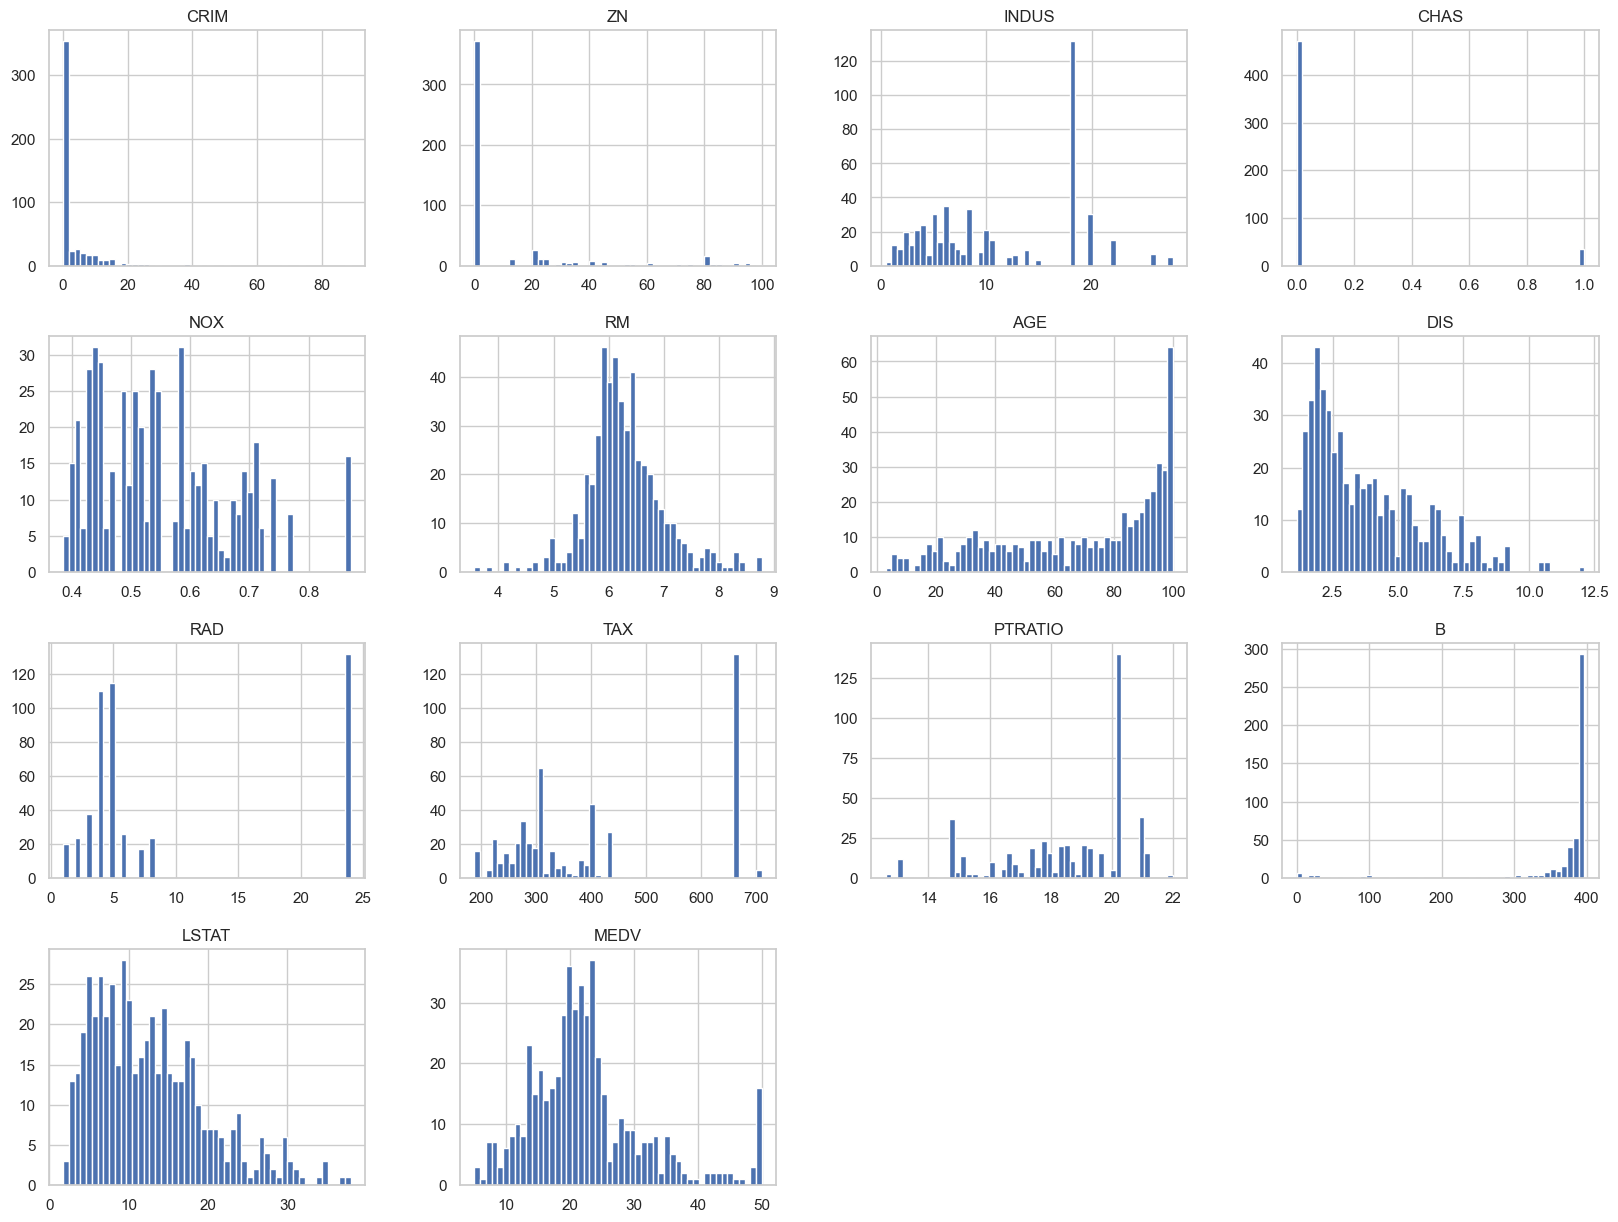

In [604]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Train Test Splitting

##### By Using our own function

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing,0.2)

print(f'Rows in train set:{len(train_set)}\nRows in test set: {len(test_set)}\n')

##### By using inbuilt sklearn train_test_split

In [605]:
from sklearn.model_selection import train_test_split

In [606]:
train_set, test_set = train_test_split(housing,test_size=0.2 ,random_state=42)
print(f'Rows in train set:{len(train_set)}\nRows in test set: {len(test_set)}\n')

Rows in train set:404
Rows in test set: 102



##### The binary feature CHAS (Charles River dummy variable), where the ratio of 0s and 1s is not balanced. If you are using this feature as a predictor in a machine learning model, the imbalance can sometimes pose challenges, It may happen that test set may not be able to take 1 or 0 while splitting and that will not bring the accuracy in the model.

##### To solve this i am using **stratified shuffled split technique** ,This approach ensures that the data is split based on the values of CHAS, maintaining a balanced representation of both 0s and 1s in both the training and testing sets.

In [607]:
from sklearn.model_selection import StratifiedShuffleSplit

In [608]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [609]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [610]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [611]:
# Ratio of 0 and 1 shuffled
print(95/7)
print(376/28)

13.571428571428571
13.428571428571429


In [612]:
housing = strat_train_set.copy()

### Looking for correlations

In [613]:
corr_metrix = housing.corr()

In [614]:
corr_metrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679441
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [615]:
from pandas.plotting import scatter_matrix

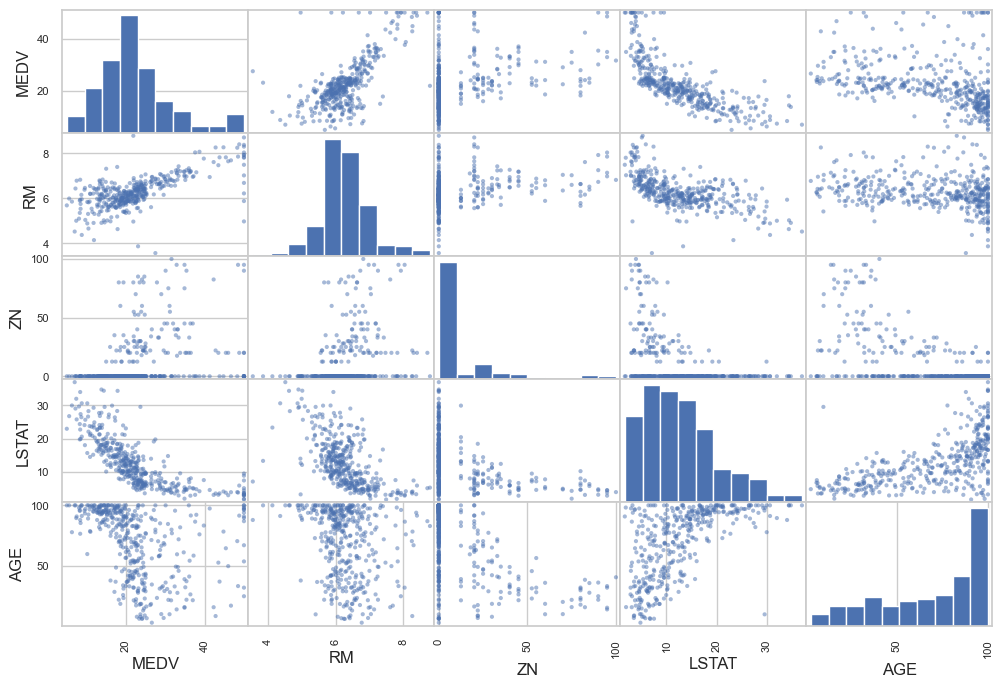

In [616]:
attributes = ['MEDV','RM','ZN','LSTAT','AGE']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

* The correlation coefficient between MEDV (Median Value of owner-occupied homes) and LSTAT (% Lower Status of a Population) is -0.737663 , the negative sign indicates a negative correlation. **As the percentage of lower-status population (LSTAT) increases, the median value of owner-occupied homes (MEDV) tends to decrease** , the relatively high magnitude suggests a strong negative correlation.


* The correlation coefficient between MEDV (Median Value of owner-occupied homes) and RM (average number of rooms per dwelling) is 0.695360 , The positive sign indicates a positive correlation. As the average number of rooms per dwelling (RM) increases, the median value of owner-occupied homes (MEDV) tends to increase , suggests that homes with a greater number of rooms tend to have higher median values. **This could be because larger houses with more rooms are generally more expensive.(moderately strong positive correlation)**.


* The correlation coefficient between MEDV (Median Value of owner-occupied homes) and ZN (proportion of residential land zoned for large lots) is 0.360445 , The positive sign indicates a positive correlation. As the proportion of residential land zoned for large lots (ZN) increases, the median value of owner-occupied homes (MEDV) tends to increase ,  A value between 0 and 1 suggests a positive correlation, but the correlation is not very strong , In this case , **areas with more land available for larger residential lots have a possibility of higher home values**.


* The correlation coefficient between MEDV (Median Value of owner-occupied homes) and AGE (proportion of owner-occupied units built prior to 1940) is -0.376955 , The negative sign indicates a negative correlation. As the proportion of owner-occupied units built prior to 1940 (AGE) increases, the median value of owner-occupied homes (MEDV) tends to decrease , A value between 0 and 1 suggests a negative correlation, but the correlation is not very strong . In this case, on average,**older homes might have lower values**.

### Treating Outliers 

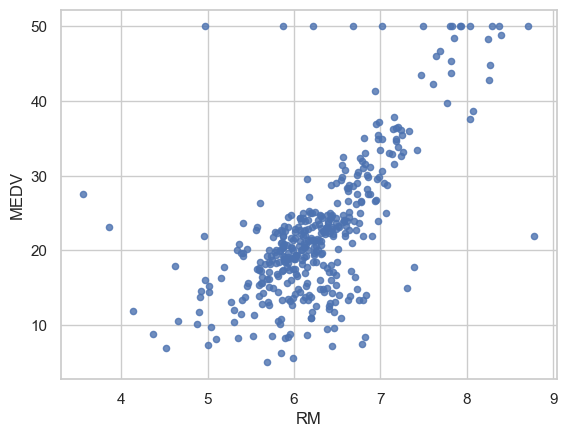

In [617]:
# Before that i am making a single scatterplot of MEDV and RM so that i can see the datapoints clearly.

housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)
plt.show()

* As i observed a strong positive correlation between RM and MEDV ,I am considering the removal of outliers from this relationship. The purpose is to ensure that my dataset remains clean, and the presence of outliers doesn't confuse or distort the learning pattern of my model. By eliminating these outliers, I aim to enhance the model's ability to identify and learn meaningful patterns in the data. This, in turn, is expected to improve the accuracy of predictions. Additionally, when fitting a simple model, the impact of outliers on the model's performance is minimized.

* I am facing a challenge in my dataset where at one point, there seems to be a cap imposed. Beyond this point, there is no variation in the target variable (MEDV), and it appears that the prices remain the same. For instance, when RM is 5, MEDV is 50, and similarly, when RM is 9, MEDV remains 50. To address this issue, I am taking the approach of removing all data points where RM is less than 7 and MEDV is equal to 50. The goal is to eliminate instances where there is no meaningful variation in the target variable, which should contribute to a more accurate and representative model.

* Write now i am not treating the outliers .

### Feature Enginiearing

**Trying out Attribute Combinations**

In [618]:
housing['TAXRM']=housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [619]:
# Lets check the corrlation again
corr_metrix = housing.corr()
corr_metrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679441
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524747
LSTAT     -0.740494
Name: MEDV, dtype: float64

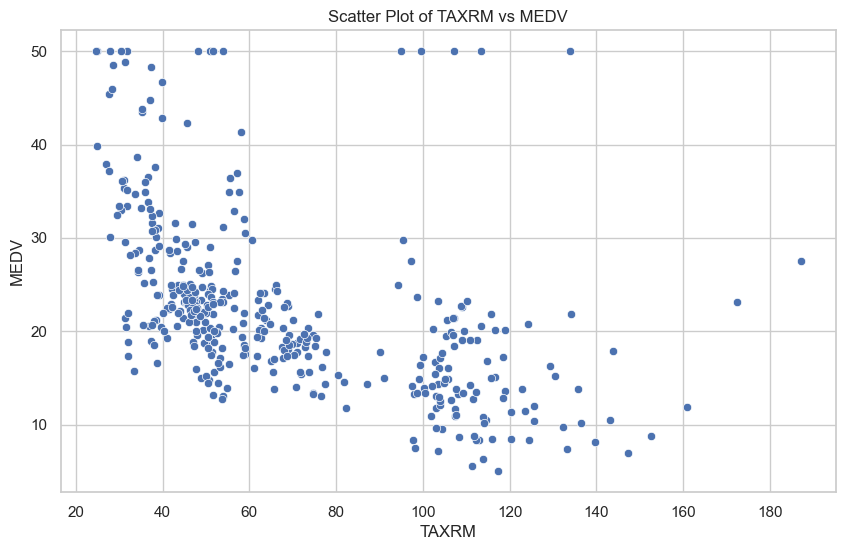

In [620]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TAXRM', y='MEDV', data=housing)
plt.xlabel('TAXRM')
plt.ylabel('MEDV')
plt.title('Scatter Plot of TAXRM vs MEDV')
plt.show()

* The negative correlation (-0.537650) suggests an inverse relationship between TAXRM and MEDV. As the value of one variable increases, the other tends to decrease . The data shows that when property tax rates are higher compared to home values (TAXRM), home prices tend to be lower (MEDV). This makes sense as higher taxes may make homes less affordable.

In [621]:
housing = strat_train_set.drop('MEDV',axis=1)
housing_labels = strat_train_set['MEDV'].copy()

### Missing Attributes

**To take care of missing attributes, you have three options:**
*     1. Get rid of the missing data points                  
*     2. Get rid of the whole attribute
*     3. Set the value to some value(0, mean or median)

In [622]:
# Missing value
housing['RM'].isnull().sum()

3

In [623]:
# I am going with 3 option
median = housing['RM'].median()
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [624]:
housing.shape

(404, 13)

**Another way of filling the missing values (By simple imputer)**

In [625]:
housing.describe()    # Before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277576,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.713072,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [626]:
from sklearn.impute import SimpleImputer

In [627]:
imputer = SimpleImputer(strategy = 'median')

In [628]:
imputer.fit(housing)

SimpleImputer(strategy='median')

In [629]:
imputer.statistics_                         # The values which imputer impute in the data

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [630]:
imputer.statistics_.shape

(13,)

In [631]:
X = imputer.transform(housing)

In [632]:
housing_tr = pd.DataFrame(X , columns=housing.columns)

In [633]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277067,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710438,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


* Here i have treated all missing values by SimpleImputer which fills missing values of all columns at one time . 

### Scikit-learn Design

**Primarily - Three types of objects**

1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

### Feature Scaling

**Primarily, two types of feature scaling methods:**

1. Min-max scaling (Normalization) (value - min)/(max - min)
Sklearn provides a class called MinMaxScaler for this

3. Standardization (value - mean)/std
Sklearn provides a class called StandardScaler for this

### Creating Pipeline

Creating a machine learning pipeline is like creating a streamlined process for teaching a computer to learn from data and make predictions. Think of it as a well-organized assembly line where data goes through different stages, each handling a specific task. This process includes preparing the data, training the computer to recognize patterns, and then using the trained model to make predictions on new data. The pipeline makes it easy to manage, deploy, and update the machine learning system efficiently.

**Different Stages**

1. Data Preprocessing
2. Feature Engineering
3. Model Training
4. Hyperparameter Tuning
5. Evaluation
6. Deployment

### Pipeline

In [634]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [635]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    #  ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [636]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr                                                 # Remember this is my numpy array.

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [637]:
housing_num_tr.shape

(404, 13)

### Selecting a desired model for Dragon Real Estates

In [638]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Let's try with **Decision Tree Regressor** and **Random Forest regressor**

lets try with **Decision Tree Regressor** and **Random Forest regressor** because Linear regressor not predicting the value which i am looking for.

In [639]:
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr , housing_labels)

RandomForestRegressor()

In [640]:
some_data = housing.iloc[:5]

In [641]:
some_labels = housing_labels.iloc[:5]

In [642]:
prepared_data = my_pipeline.transform(some_data)

In [643]:
model.predict(prepared_data)

array([22.45 , 25.316, 16.822, 23.279, 23.578])

In [644]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

### Evaluating The Model

In [645]:
from sklearn.metrics import mean_squared_error

In [646]:
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [647]:
mse

1.4408679628712862

In [648]:
rmse

1.200361596716292

$Linear Regression$
My target variable has a small range, say from 5 to 50, an RMSE of 4.8285 might be relatively high. In contrast, if your target variable has a larger scale, the same **RMSE** might be more acceptable. So , this model i am going to discard because the **MSE** 23.3151 is also not that good error is high . **Discarding this model**

$Decision Tree Regressor$ Here i am getting an **MSE** of 0.0 and **RMSE** of 0.0 , it indicates that the model has perfectly fit the training data. This situation is often a sign of overfitting, where the model captures the noise and intricacies of the training data to an extent that it doesn't generalize well to new, unseen data. **Lets apply some better evaluation technique on this**

$Random Forest model$ shows promising performance on the training data with an **MSE** of 1.44 and **RMSE** of 1.200. While these metrics suggest accurate predictions, caution is warranted to avoid potential overfitting. To ensure reliable generalization to new data, consider employing techniques like cross-validation for a comprehensive evaluation and refinement of the model. **Lets apply some better evaluation technique on this**

### Using Better Evaluation Technique 
- $Cross Validation$

$Cross-validation$ is a technique used in machine learning to assess how well a model will generalize to an independent dataset. It involves splitting the dataset into multiple subsets, training the model on different subsets, and evaluating its performance on the remaining data.This way, we ensure the model can handle diverse challenges in the data. 

In [649]:
from sklearn.model_selection import cross_val_score

In [650]:
scores = cross_val_score(model, housing_num_tr , housing_labels, scoring = 'neg_mean_squared_error' , cv=10)
rmse_scores = np.sqrt(-scores)

In [651]:
rmse_scores

array([2.96787301, 3.00786493, 4.52713035, 2.55798195, 3.30463851,
       2.66326972, 4.70104469, 3.28764681, 3.41134803, 3.11916839])

### Lets understanding the performance of our models.

In [652]:
def print_scores(scores):
    print('Scores: ',scores)
    print('Mean: ',scores.mean())
    print('Standard Deviation: ',scores.std())

In [653]:
print_scores(rmse_scores)

Scores:  [2.96787301 3.00786493 4.52713035 2.55798195 3.30463851 2.66326972
 4.70104469 3.28764681 3.41134803 3.11916839]
Mean:  3.35479664063845
Standard Deviation:  0.6808589032387713


### Conclusion Between models

After checking both models, Random Forest and Decision Tree, it seems they make similar errors, fitting well with our target variable's range. This suggests both models work well for predicting our variable. However, I'm leaning towards Random Forest because it appears slightly more effective. We'll keep an eye on how they perform with new data, but for now, **Random Forest** looks like the better choice

**Convert this notebook into a python file and run the pipeline using Visual Studio Code**

## Saving the Model

In [655]:
from joblib import dump,load
dump(model, 'Dragon_Real_Estate.joblib')

['Dragon_Real_Estate.joblib']

### Testing The Model On Test Data

In [659]:
x_test = strat_test_set.drop('MEDV',axis=1)
y_test = strat_test_set['MEDV'].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(y_test))

In [660]:
final_rmse

2.959343508280171

In [665]:
prepared_data[2]

array([ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
        0.29163682,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
        0.81196637,  0.44624347,  0.81480158])

### Using the model

In [666]:
from joblib import dump, load
import numpy as np
model = load('Dragon_Real_Estate.joblib')
input = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23827071, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input)

array([22.45])

**We can check our model performance by changing the values or by putting different feature value**

Thank You!